In [1]:
# Scientific libraries		              
import numpy as np		              
import scipy as sp		              
import pandas as pd		              
import json		              
import missingno as msno		              

# Loading Plotting Modules		              
import matplotlib		              
import matplotlib.pyplot as plt		              
import seaborn as sns		              
%matplotlib inline		              
import chart_studio.plotly as py		              
import plotly.figure_factory as ff		              
import plotly.graph_objects as go		              
import plotly.express as px		              
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot		              
init_notebook_mode(connected=True)		              
		              
import os		              
import gc

In [2]:
# Setting Data Frame Options                      
pd.set_option('display.max_rows', 150)                      
pd.set_option('display.max_columns', 50)                      
pd.set_option('display.width', 100)                      
pd.set_option('display.max_colwidth', 100)                      

# Setting Plot Configuration                      
sns.set(rc={'figure.figsize':(19,11)}, style = 'white')

In [3]:
train = pd.read_csv('../../data/train.csv')  
m, n = train.shape                
print('Data Frame: {} x {}'.format(m,n))                
train.head()

Data Frame: 3865 x 80


,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),...,"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,38.305483,681.841086,22.131436,150.259290,129.841789,12.403812,490.446400,60.121580,57.028183,69.825369,46.018230,98.216072,...,NaN,NaN,NaN,75.604799,NaN,NaN,42.616284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,NaN,NaN,36.255559,423.973089,89.294181,117.069332,61.822590,13.054898,560.547706,58.573002,69.873905,76.752305,40.167960,88.322574,...,NaN,NaN,NaN,57.214150,57.314932,56.187355,29.908422,6.225946,44.780023,NaN,120.886080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,NaN,NaN,18.093991,285.572207,57.491083,226.523760,134.558437,15.963001,555.012461,43.078497,59.462626,59.152506,91.093668,114.163995,...,NaN,NaN,NaN,76.141735,42.405827,53.927715,18.732049,4.138115,24.030945,NaN,96.626831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.202247,47.785456,279.000175,193.228799,12.940991,766.807703,51.318372,50.535797,54.931369,92.727892,97.645232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,NaN,NaN,34.497468,633.799718,103.562629,28.359587,51.098250,25.521926,585.434804,56.158054,85.020965,84.708158,71.493810,53.835875,...,NaN,NaN,134.967049,NaN,77.223935,75.475076,31.398393,NaN,66.674651,NaN,N

In [4]:
test = pd.read_csv('../../data/test.csv')  
m, n = test.shape                
print('Data Frame: {} x {}'.format(m,n))                
test.head()

Data Frame: 890 x 79


,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),...,Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,105.193088,64.241392,17.418350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1007012,Reticulum III,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,247.580771,55.730638,46.217440,33.027886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1008016,Reticulum III,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,249.798771,58.755900,48.897493,31.613362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007012,Segue 1,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,211.505060,70.176431,61.254104,34.399007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1013042,Virgo I,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,234.721069,69.768692,51.316940,15.657091,1106.554194,64.382217,219.588961,129.974418,14.013421,474.877713,21.305665,59.144562,63.990109,80.409057,111.084652,...,96.028122,21309.50697,18103.974021,50.233592,86.296925,29.065459,58.562225,13.313253,NaN,42.980727,99276.25673,NaN,458.186555,79.177012,41.585873,7.357729,0.583373,0.600445,0.856158,206.674424,224.104054,NaN,7.687626,NaN,NaN


In [5]:
df = train.append(test, ignore_index=True)
df

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),...,"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,38.305483,681.841086,22.131436,150.259290,129.841789,12.403812,490.446400,60.121580,57.028183,69.825369,46.018230,98.216072,...,NaN,NaN,NaN,75.604799,NaN,NaN,42.616284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,NaN,NaN,36.255559,423.973089,89.294181,117.069332,61.822590,13.054898,560.547706,58.573002,69.873905,76.752305,40.167960,88.322574,...,NaN,NaN,NaN,57.214150,57.314932,56.187355,29.908422,6.225946,44.780023,NaN,120.886080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,NaN,NaN,18.093991,285.572207,57.491083,226.523760,134.558437,15.963001,555.012461,43.078497,59.462626,59.152506,91.093668,114.163995,...,NaN,NaN,NaN,76.141735,42.405827,53.927715,18.732049,4.138115,24.030945,NaN,96.626831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.202247,47.785456,279.000175,193.228799,12.940991,766.807703,51.318372,50.535797,54.931369,92.727892,97.645232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,NaN,NaN,34.497468,633.799718,103.562629,28.359587,51.098250,25.521926,585.434804,56.158054,85.020965,84.708158,71.493810,53.835875,...,NaN,NaN,134.967049,NaN,77.223935,75.475076,31.398393,NaN,66.674651,NaN,N

In [20]:
keyword = 'GGP'

In [128]:
# remove 'Gross galactic product (GGP) per capita'
ggp = df.loc[:, df.columns.str.contains(keyword)].drop('Gross galactic product (GGP) per capita', axis=1)
ggp

,Gross capital formation (% of GGP),"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Domestic credit provided by financial sector (% of GGP),Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Current health expenditure (% of GGP),Private galaxy capital flows (% of GGP)
0,38.305483,7760.639489,13.617993,94.859306,75.604799,42.616284,NaN,NaN,NaN
1,36.255559,6969.137436,19.484830,77.935108,57.214150,29.908422,6.225946,NaN,22.785018
2,18.093991,3276.634176,13.357158,87.508620,76.141735,18.732049,4.138115,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34.497468,8957.403969,NaN,241.901357,NaN,31.398393,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


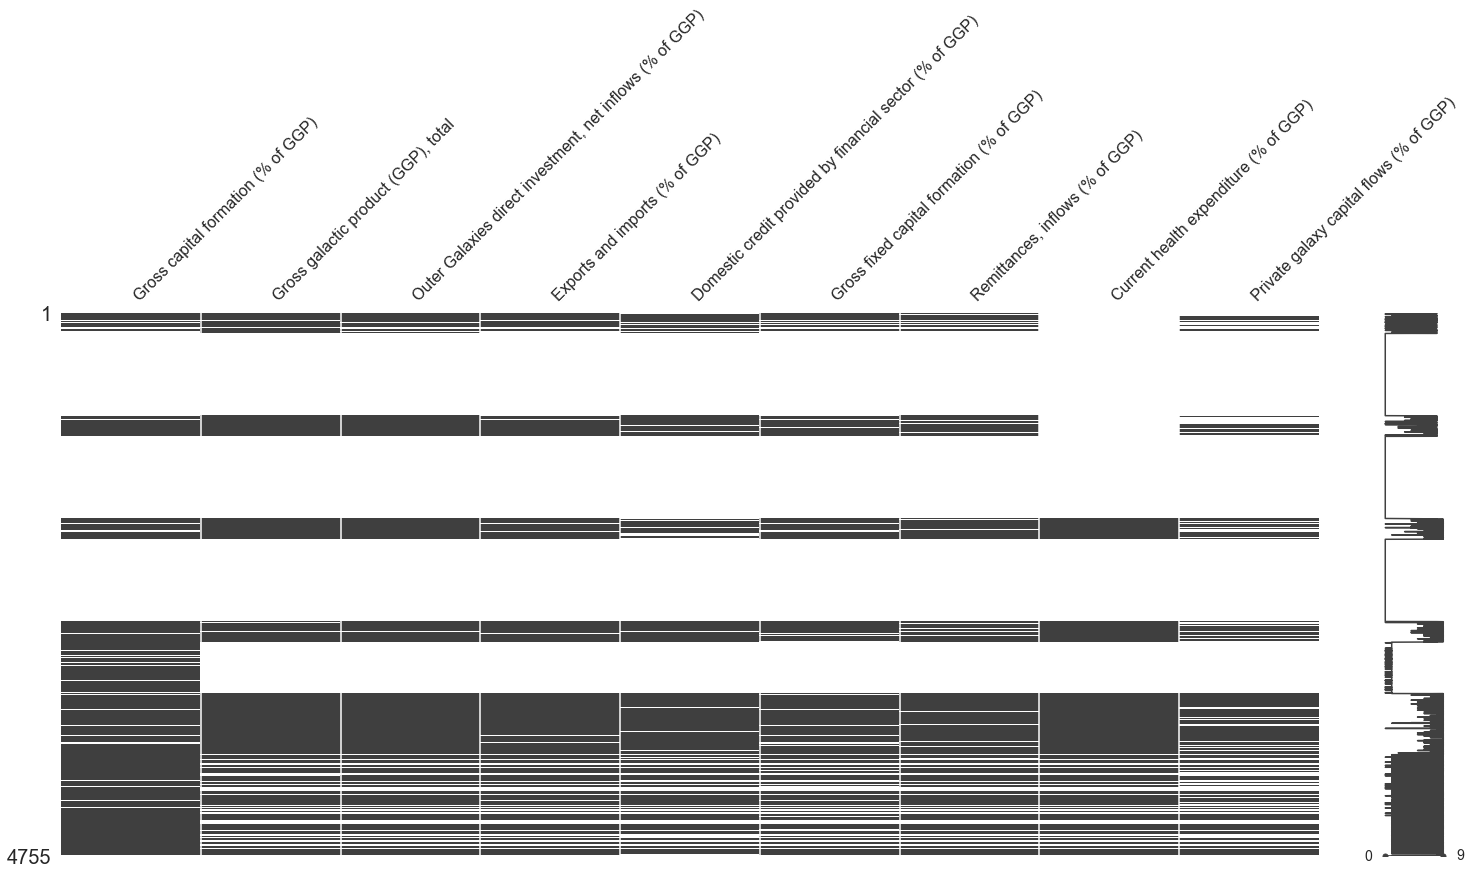

In [29]:
msno.matrix(ggp)

In [137]:
def get_test_index(train_index, all_index):
    return list(set(all_index) - set(train_index))

def distribute_test(y, coef):
    """
    From y and coef it will create X by the col order
    same as coef.
    
    y: target array to be distributed.
    coef: coefficients of features.
    """
    if not isinstance(y, np.ndarray):
        y = np.array(y)
        
    if not isinstance(coef, np.ndarray):
        coef = np.array(coef)
        
    y = y.reshape(len(y), 1)
    coef = coef.reshape(1, len(coef))
    
    return np.matmul(y, coef)

def mse_df(actual, pred, axis=0, squared=True):
    actual = actual.fillna(0).copy()
    d = (actual.reset_index(drop=True) - pred.reset_index(drop=True)) ** 2
    if squared:
        return d.sum(axis=axis)
    else:
        return np.sqrt(d.sum(axis=axis))

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [142]:
y = 'Gross galactic product (GGP), total'
X = ggp.columns.drop(y)
cols = ggp.columns

In [143]:
scaler = MinMaxScaler()
ggp = scaler.fit_transform(ggp)
ggp = pd.DataFrame(ggp, columns=cols)

In [144]:
ggp_train = ggp.dropna(axis=0, how='any') # drop any row contaning NA
ggp_test = ggp.loc[get_test_index(ggp_train.index, ggp.index), :]

print('Train size:', ggp_train.shape[0])
print('Test size:', ggp_test.shape[0])

Train size: 1051
Test size: 3704


In [145]:
lm = LinearRegression(
    fit_intercept=False,
    normalize=False,
    n_jobs=-1)

lm.fit(ggp_train[X], ggp_train[y])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [146]:
X_pred_train = pd.DataFrame(distribute_test(ggp_train[y], lm.coef_),
                           columns=X)
X_pred_train.head()

,Gross capital formation (% of GGP),"Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Domestic credit provided by financial sector (% of GGP),Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Current health expenditure (% of GGP),Private galaxy capital flows (% of GGP)
0,0.001797,-0.000942,-0.004748,0.007943,0.002894,-0.004212,0.002443,0.002171
1,0.003986,-0.002089,-0.010529,0.017615,0.006417,-0.009341,0.005418,0.004815
2,0.001949,-0.001021,-0.005148,0.008613,0.003138,-0.004567,0.002649,0.002354
3,0.002101,-0.001101,-0.005550,0.009285,0.003383,-0.004924,0.002856,0.002538
4,0.002841,-0.001489,-0.007505,0.012556,0.004574,-0.006658,0.003862,0.003432


In [147]:
lm.coef_, sum(lm.coef_)

(array([ 0.02840012, -0.01488341, -0.07502843,  0.12551484,  0.04572738,
        -0.06655914,  0.03860398,  0.03431163]),
 0.11608696865875676)

In [148]:
mse_df(ggp_train[X], X_pred_train, squared=False)

Gross capital formation (% of GGP)                          12.961051
Outer Galaxies direct investment, net inflows (% of GGP)     4.607676
Exports and imports (% of GGP)                               9.093277
Domestic credit provided by financial sector (% of GGP)      9.801470
Gross fixed capital formation (% of GGP)                    11.323386
Remittances, inflows (% of GGP)                              2.691205
Current health expenditure (% of GGP)                       11.224173
Private galaxy capital flows (% of GGP)                     29.460474
dtype: float64

In [149]:
X_pred_test = pd.DataFrame(distribute_test(ggp_test[y], lm.coef_),
                           columns=X)
X_pred_test.head()

,Gross capital formation (% of GGP),"Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Domestic credit provided by financial sector (% of GGP),Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Current health expenditure (% of GGP),Private galaxy capital flows (% of GGP)
0,0.002179,-0.001142,-0.005756,0.009629,0.003508,-0.005106,0.002962,0.002632
1,0.001980,-0.001038,-0.005232,0.008752,0.003189,-0.004641,0.002692,0.002393
2,0.001055,-0.000553,-0.002787,0.004663,0.001699,-0.002473,0.001434,0.001275
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.002479,-0.001299,-0.006548,0.010955,0.003991,-0.005809,0.003369,0.002995


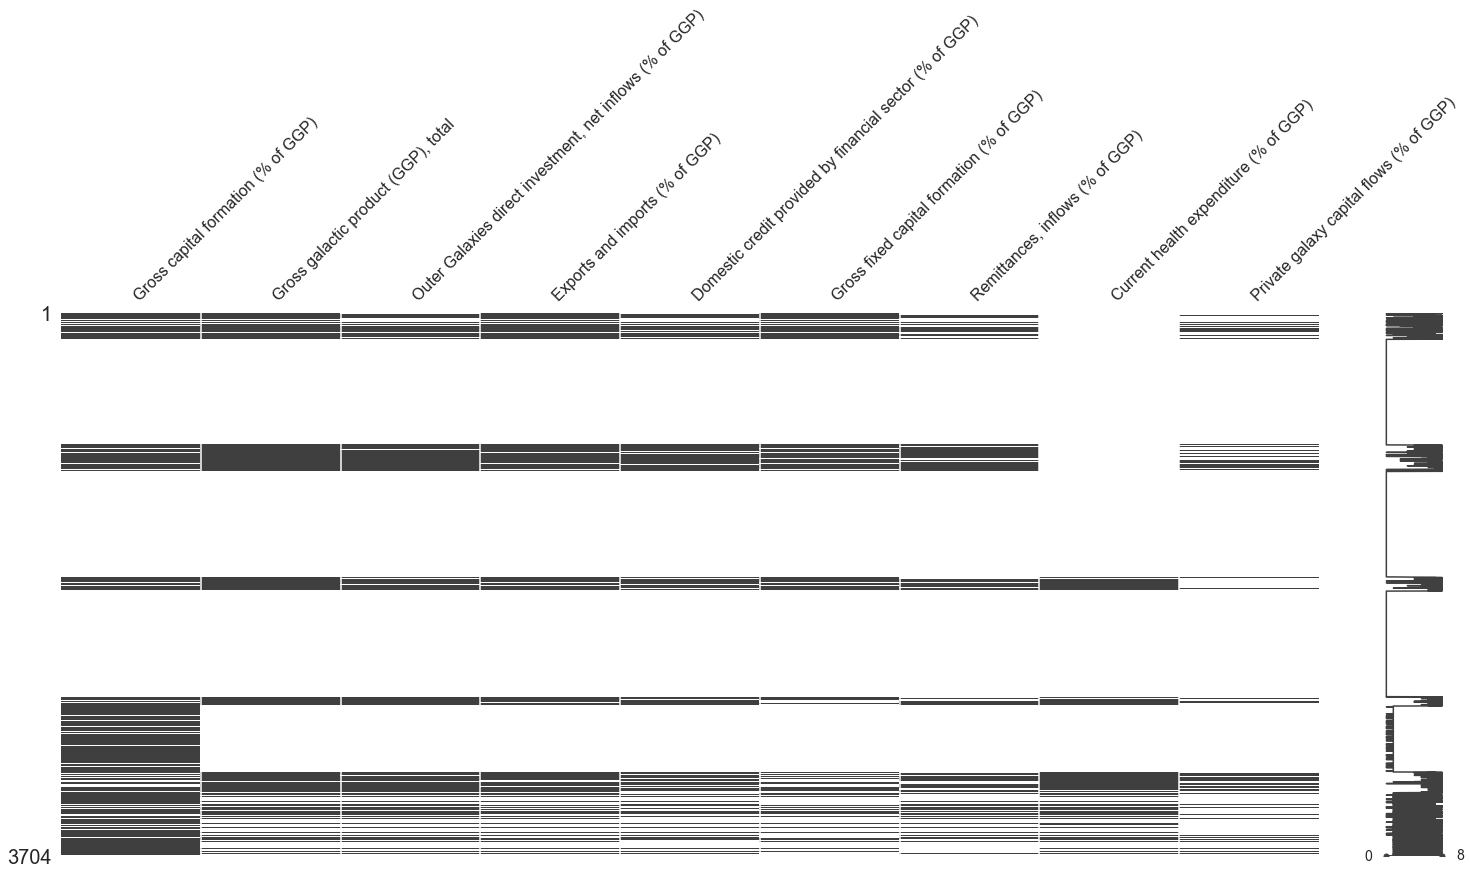

In [152]:
msno.matrix(ggp_test)

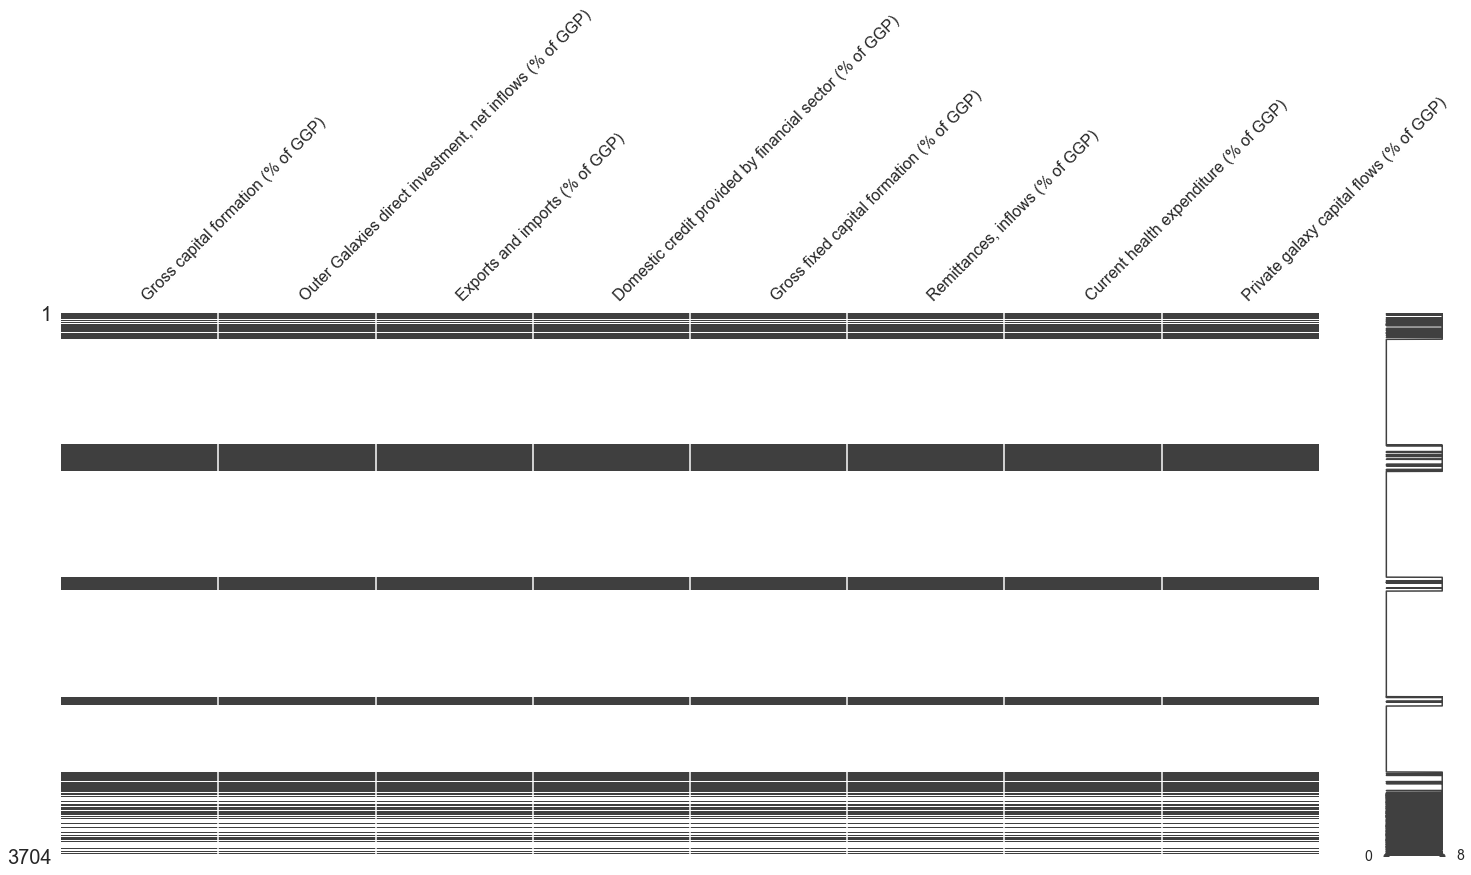

In [154]:
msno.matrix(X_pred_test)

In [153]:
mse_df(ggp_test[X], X_pred_test, squared=False)

Gross capital formation (% of GGP)                          10.335653
Outer Galaxies direct investment, net inflows (% of GGP)     3.459869
Exports and imports (% of GGP)                               7.208140
Domestic credit provided by financial sector (% of GGP)      6.017292
Gross fixed capital formation (% of GGP)                     8.846042
Remittances, inflows (% of GGP)                              2.367458
Current health expenditure (% of GGP)                        5.884170
Private galaxy capital flows (% of GGP)                     17.219810
dtype: float64